In [72]:
#Imports etc
import matplotlib 
import numpy
from matplotlib import pyplot
%matplotlib inline

In [73]:
x = 0 
while x < 5:
    print(x)
    x = x+1

0
1
2
3
4


Our goal today will be to study real LHC data. We processed it a bit for you, before you arrived.  We have picked out only events with at least two reconstructed leptons (electron or muon or antielectron or antimuon).  In every event we stored into a file the reconstructed energy and momentum of the most energetic two.

In [74]:
# First we have to open the file:
Events=numpy.loadtxt("Events.txt")

This file is a list of numbers reconstructed from each event by complicated software of the ATLAS detector.

Actually, with the full ATLAS event description, every event is described by around 100,000 numbers.  We pulled out only the 14 most useful numbers for this exercise.  In each event particle 1 is the reconstructed lepton with the highest pT, and particle 2 has the second highest.  The numbers we stored are:

0) event number

1) run number

2) particle 1 P_x

3) particle 1 P_y

4) particle 1 P_z

5) particle 1 E

6) particle 1 charge

7) particle 1 ID

8) particle 2 P_x

9) particle 2 P_y

10) particle 2 P_z

11) particle 2 E

12) particle 2 charge

13) particle 2 ID



The events are just stored in a big numpy array.  Lets see how many events there are:

In [75]:
print(len(Events))

16186


And lets look at the list of numbers in the first one:

In [76]:
print (Events[0])

[ 3.5612214e+07  2.1307900e+05  8.7624900e+01  6.8183800e+01
  3.7705800e+02  3.9306400e+02 -1.0000000e+00  1.3000000e+01
  1.0298200e+01  3.1087100e+00  3.0197100e+01  3.2056100e+01
  1.0000000e+00 -1.3000000e+01]


In [77]:
# Exercise : Look up the energy of the highest pT lepton in the 
# 9th event (event number 9)
print ("The energy is", Events[9,0], "GeV")
print (Events[9])


The energy is 58474488.0 GeV
[ 5.8474488e+07  2.1296700e+05  1.4495800e+01 -1.0491400e+02
 -5.7264100e+02  5.8235200e+02 -1.0000000e+00  1.3000000e+01
  8.5092300e+00 -2.9264500e+01 -9.8184800e+01  1.0280600e+02
  1.0000000e+00 -1.3000000e+01]


In [78]:
# Exercise : Look up the charge of the second highest pT lepton 
# in the 1000th event

print (Events[999,12])
print (Events[999][12])


-1.0
-1.0


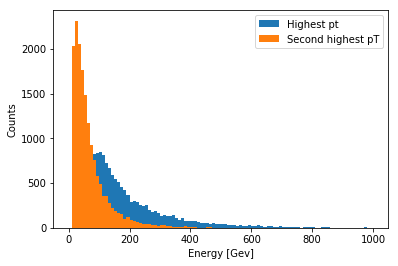

In [79]:
# Exercise : Histogram the energy of the highest pT leptons
#            Histogram the energy of the next highest pT leptons
#            use 100 bins between 0 and 1000 GeV
#            show both histograms on the same plot
#            label axes and add a legend

number = len(Events)
energies_first = numpy.zeros(number)
energies_second = numpy.zeros(number)

iterate = 0 
while iterate<number: 
    energies_first[iterate] = Events[iterate][5]
    energies_second[iterate] = Events[iterate][11]
    
    iterate = iterate + 1
    
bins = numpy.linspace(0,1000,101)
pyplot.hist(energies_first, bins,label="Highest pt")
pyplot.hist(energies_second,bins,label="Second highest pT")
pyplot.xlabel("Energy [Gev]")
pyplot.ylabel("Counts")
pyplot.legend()
    

In [80]:
# Exercise : How many events have first and second leptons with +ve charge?
#            How many with both -ve?
#            How many +-?  How many -+?
#            Which are the most common categories?
plus_plus   = 0
minus_minus = 0
plus_minus  = 0
minus_plus  = 0

iterate = 0
# we loop over all the events, and count them up! 
while iterate < number:
    event = Events[iterate]
    
    if event[6]>0:
        if event[12]>0:
            plus_plus += 1
        else:
            plus_minus += 1 
    else:
        if event[12]>0:
            minus_plus += 1
        else:
            minus_minus += 1

    iterate += 1

print("Both plus: {}".format(plus_plus))
print("Minus Plus: {}".format(minus_plus))
print("Plus Minus: {}".format(plus_minus))
print("Minus Minus: {}".format(minus_minus))
            

Both plus: 474
Minus Plus: 7737
Plus Minus: 7579
Minus Minus: 396


In particle physics we use special number codes for different particle types.  The list of codes is maintained by the Particle Data Group, so we call them PDG ID's.  Here is the full list of PDG IDs:

http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf

Look up the ID for electrons and muons, then try the next exercise. Note that particles have +ve PDG and antiparticles have negative ones.  You can turn them all positive using the abs() command.

In [83]:
# Exercise : Separate the events into three sets
#             1) Events with two muons or antimuons
#             2) Events with two electrons or positrons
#             3) Events with one muon/antimuon and one electron/positron
#            Put each set into a new list
#            How many are in each category?

MuonMuon=[]
MuonElec=[]
ElecElec=[]

for E in Events:
    if abs(E[7])==11 and abs(E[13])==11:
        ElecElec.append(E)
    if abs(E[7])==13 and abs(E[13])==13:
        MuonMuon.append(E)
    if (abs(E[7])==13 and abs(E[13])==11) or (abs(E[7])==11 and abs(E[13])==13):
            MuonElec.append(E)
print("Number of ee events", len(ElecElec))
print("Number of mumu events", len(MuonMuon))
print("Number of mue events", len(MuonElec))

Number of ee events 1366
Number of mumu events 11165
Number of mue events 3655


In python, it is possible to save the array easily to a text file. For example, the line below re-saves the full events array to a text file called EventsNew.txt

In [84]:
numpy.savetxt("EventsNew.txt",Events)

In [70]:
Events2=numpy.loadtxt("EventsNew.txt")

In [85]:
# Exercise : Save to three text files, the contents of your separated
#            sets of particles.  We will use these tomorrow to search for 
#            new particles.

numpy.savetxt("ee.txt",ElecElec)
numpy.savetxt("mumu.txt",MuonMuon)
numpy.savetxt("emu.txt",MuonElec)

In [86]:
# Open exercise : Explore the LHC data! Make plots of various
#                  quantities and look for interesting effects.
#
#            Ideas:
#               Do events with two muons or two electrons have different
#                 properties to events with one of each?
#
#               What types of events have mostly same-charge particles in?
#
#               Do the energies of the same-sign events look similar
#                 to the energies of the different-sign events?